## Import Data

In [27]:

import pandas as pd

# Mengimpor data dari file CSV ke dalam DataFrame
file_path = r'C:\Users\naufa\Downloads\Training\Reddit\Suicide_Detection.csv'
data = pd.read_csv(file_path, encoding='utf-8')

# Menampilkan beberapa baris pertama dari DataFrame
data

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...,...
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide


# Merapihkan data

In [28]:
# penamaan kolom Unnamed
data.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
# Ganti label
data['class'] = data['class'].replace({'suicide': 1, 'non-suicide': 0})
# hapus kolom id
data=data.drop('id', axis=1)
# Display the DataFrame to verify the changes
data

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,1
1,Am I weird I don't get affected by compliments...,0
2,Finally 2020 is almost over... So I can never ...,0
3,i need helpjust help me im crying so hard,1
4,"I’m so lostHello, my name is Adam (16) and I’v...",1
...,...,...
232069,If you don't like rock then your not going to ...,0
232070,You how you can tell i have so many friends an...,0
232071,pee probably tastes like salty tea😏💦‼️ can som...,0
232072,The usual stuff you find hereI'm not posting t...,1


## Pemotongan data (opsional)


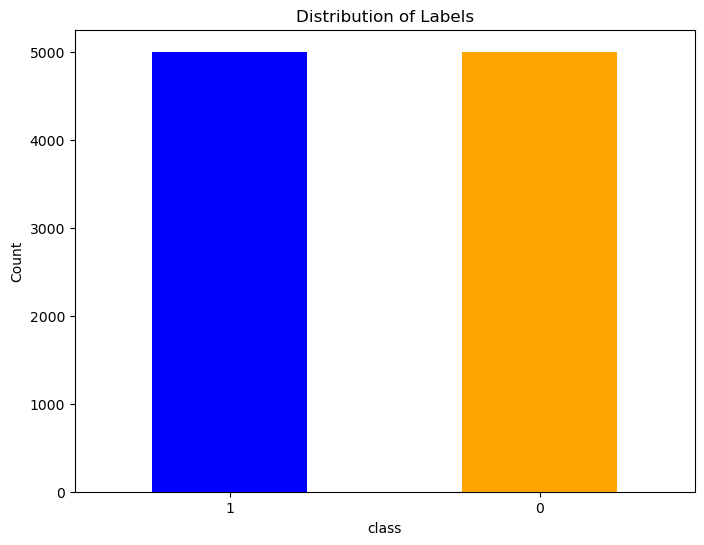

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Split the data into two subsets based on the class label
data_class_0 = data[data['class'] == 0]
data_class_1 = data[data['class'] == 1]

# Specify the desired number of rows for each class
desired_rows_per_class = 20000  # 15,000 / 2

# Sample a subset from each class
sampled_data_class_0 = data_class_0.sample(n=desired_rows_per_class, random_state=42)
sampled_data_class_1 = data_class_1.sample(n=desired_rows_per_class, random_state=42)

# Combine the sampled subsets
data = pd.concat([sampled_data_class_0, sampled_data_class_1])

# Shuffle the combined dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the sampled dataset
data

plt.figure(figsize=(8, 6))
data['class'].value_counts().plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Distribution of Labels')
plt.xlabel('class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


## Text Preprocessing

In [5]:
import pandas as pd
import numpy as np
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

# Download resources for NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Remove URLs and special characters using regex
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\@\w+|\#', '', text)

    # Tokenization using nltk
    words = word_tokenize(text)

    # Remove stopwords using nltk
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]

    # Stemming using Snowball
    #stemmer = SnowballStemmer('english')
    #words = [stemmer.stem(word) for word in words]

    # Lemmatization using WordNetLemmatizer
    #lemmatizer = WordNetLemmatizer()
    #words = [lemmatizer.lemmatize(word) for word in words]

    # Join the words back into a single string
    preprocessed_text = ' '.join(words)

    return preprocessed_text

# Apply the preprocessing function to the 'text' column in your dataset
data['text'] = data['text'].apply(preprocess_text)

# Display the preprocessed data
data


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\naufa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naufa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\naufa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,class
0,"16 , transgender , ruining lifei transgender m...",1
1,always hear people talk “ boys ” “ girls ” fri...,0
2,’ ever listen songs ur childhood ? brings back...,0
3,please fill survey business report greatly hel...,0
4,take r/dogdiet ? look downright disgusting thi...,0
...,...,...
9995,think tonight 'm finally iti moved year ago li...,1
9996,'m trying best keep going 'm done.i 'm 24 ca n...,1
9997,pretty sure suicide inevitable mei go good pha...,1
9998,girl great financial decision show low interes...,0


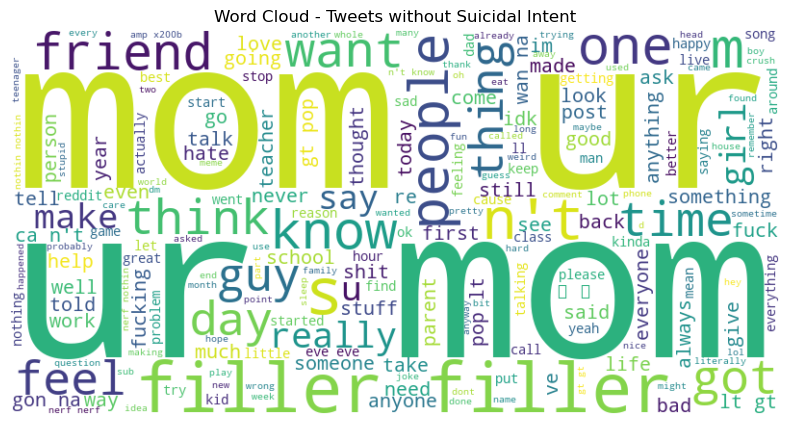

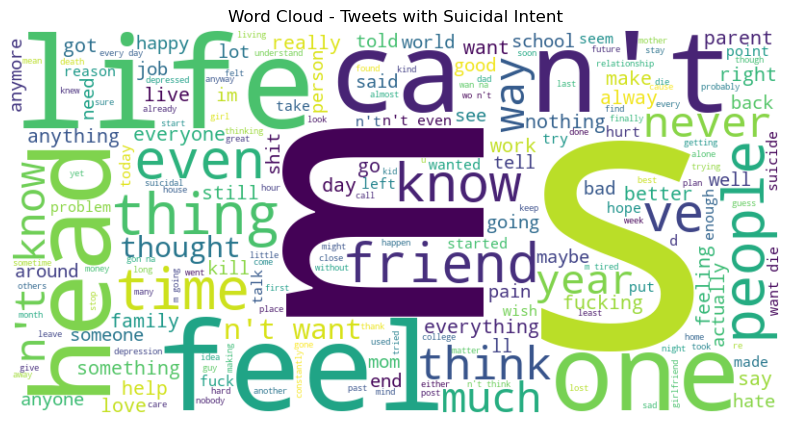

In [6]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load your dataset
# Assuming 'data' is the name of your DataFrame
# You may need to adjust the actual column names based on your dataset
# data = pd.read_csv('your_dataset.csv')

# Filter tweets based on labels (0 for no suicidal intent, 1 for suicidal intent)
no_suicide_tweets = data[data['class'] == 0]['text']
suicide_tweets = data[data['class'] == 1]['text']

# Function to generate and display word cloud
def generate_word_cloud(text_data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_data))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate and display word cloud for tweets without suicidal intent
generate_word_cloud(no_suicide_tweets, 'Word Cloud - Tweets without Suicidal Intent')

# Generate and display word cloud for tweets with suicidal intent
generate_word_cloud(suicide_tweets, 'Word Cloud - Tweets with Suicidal Intent')


## Naive Bayes dan LSTM

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Naive Bayes Accuracy: 0.86
Epoch 1/5
50/50 [==============================] - 130s 3s/step - loss: 0.5982 - accuracy: 0.6878 - val_loss: 0.4605 - val_accuracy: 0.8100
Epoch 2/5
50/50 [==============================] - 126s 3s/step - loss: 0.3895 - accuracy: 0.8441 - val_loss: 0.3254 - val_accuracy: 0.8819
Epoch 3/5
50/50 [==============================] - 128s 3s/step - loss: 0.2393 - accuracy: 0.9203 - val_loss: 0.2649 - val_accuracy: 0.9031
Epoch 4/5
50/50 [==============================] - 128s 3s/step - loss: 0.1672 - accuracy: 0.9486 - val_loss: 0.2541 - val_accuracy: 0.9087
Epoch 5/5
63/63 [==============================] - 15s 239ms/step - loss: 0.2554 - accuracy: 0.9120
LSTM Accuracy: 0.91


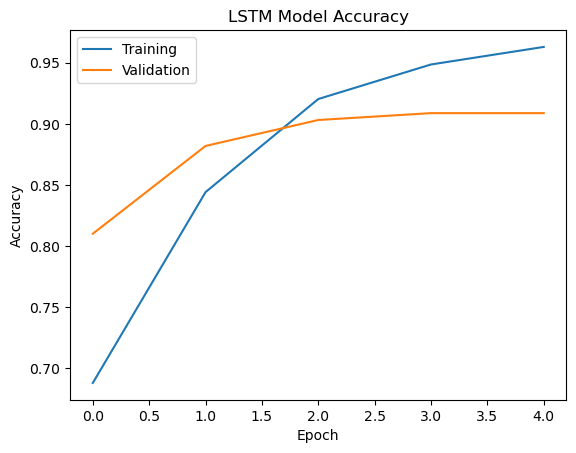

In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam


# Load preprocessed data
# Assuming 'data' is the name of your DataFrame
# You may need to adjust the actual column names based on your dataset
#data = pd.read_csv('your_preprocessed_dataset.csv')

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data['text'], data['class'], test_size=0.2, random_state=42)

# Vectorization using FastText
vectorizer = CountVectorizer(analyzer='word', tokenizer=lambda x: x.split(), preprocessor=lambda x: x)
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)

# Naive Bayes Model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(train_vectors, train_labels)

# Evaluate Naive Bayes model
naive_bayes_accuracy = naive_bayes_model.score(test_vectors, test_labels)
print(f"Naive Bayes Accuracy: {naive_bayes_accuracy:.2f}")

# LSTM Model
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data)
train_sequences = tokenizer.texts_to_sequences(train_data)
test_sequences = tokenizer.texts_to_sequences(test_data)

max_len = max(len(sequence) for sequence in train_sequences)
train_sequences = pad_sequences(train_sequences, maxlen=max_len)
test_sequences = pad_sequences(test_sequences, maxlen=max_len)

lstm_model = Sequential()
lstm_model.add(Embedding(max_words, 32, input_length=max_len))
lstm_model.add(LSTM(25))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train LSTM model
history = lstm_model.fit(train_sequences, train_labels, epochs=5  , batch_size=128, validation_split=0.2)

# Evaluate LSTM model
lstm_accuracy = lstm_model.evaluate(test_sequences, test_labels)[1]
print(f"LSTM Accuracy: {lstm_accuracy:.2f}")

# Plot accuracy and validation accuracy for LSTM
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()


In [137]:
lstm_accuracy = accuracy_score(test_labels, lstm_predictions)
lstm_report = classification_report(test_labels, lstm_predictions)
print(lstm_report)

naive_bayes_accuracy = accuracy_score(test_labels, naive_bayes_predictions)
naive_bayes_report = classification_report(test_labels, naive_bayes_predictions)
print(naive_bayes_report)


              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1013
           1       0.93      0.89      0.91       987

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000

              precision    recall  f1-score   support

           0       0.97      0.75      0.84      1013
           1       0.79      0.97      0.87       987

    accuracy                           0.86      2000
   macro avg       0.88      0.86      0.86      2000
weighted avg       0.88      0.86      0.86      2000



In [70]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

# Assuming you already have the following variables defined:
# test_labels, lstm_predictions, naive_bayes_predictions

# Calculate accuracy and classification report for LSTM
lstm_accuracy = accuracy_score(test_labels, lstm_predictions)
lstm_report = classification_report(test_labels, lstm_predictions, output_dict=True)

# Create a DataFrame for LSTM report
lstm_df = pd.DataFrame(lstm_report).transpose()

# Save LSTM report to Excel
lstm_df.to_excel("lstm_report.xlsx")

# Calculate accuracy and classification report for Naive Bayes
naive_bayes_accuracy = accuracy_score(test_labels, naive_bayes_predictions)
naive_bayes_report = classification_report(test_labels, naive_bayes_predictions, output_dict=True)

# Create a DataFrame for Naive Bayes report
naive_bayes_df = pd.DataFrame(naive_bayes_report).transpose()

# Save Naive Bayes report to Excel
naive_bayes_df.to_excel("naive_bayes_report.xlsx")


## XGBoost

In [12]:
# Tokenisasi dan vektorisasi 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
import matplotlib.pyplot as plt

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text'])

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, data['class'], test_size=0.2, random_state=42)

# Membuat model XGBoost
model = XGBClassifier(learning_rate=0.3, max_depth=4, n_estimators=125)

# Mendefinisikan hyperparameter yang akan di-tune
# param_grid = {
#     'learning_rate': [0.2, 0.3],
#     'max_depth': [3, 4, 5],
#     'n_estimators': [100, 125],
# }

# Grid Search untuk hyperparameter tuning
#grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
model.fit(X_train, y_train)

import matplotlib.pyplot as plt
import numpy as np

# Menyimpan hasil grid search ke dalam DataFrame
#results = pd.DataFrame(grid_search.cv_results_)

# Melihat best estimator
#best_model = grid_search.best_estimator_

# Membuat prediksi
y_pred = model.predict(X_test)

# Menghitung dan menyimpan skor
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Menyimpan skor ke dalam Excel
scores = pd.DataFrame({'Accuracy': [accuracy], 'Precision': [precision], 'Recall': [recall]})
scores
#scores.to_excel('evaluation_scores.xlsx', index=False)

# Plot skor validasi untuk setiap kombinasi hyperparameter
#plt.figure(figsize=(12, 6))

# Plot skor validasi untuk setiap kombinasi hyperparameter
# for learning_rate in param_grid['learning_rate']:
#     for max_depth in param_grid['max_depth']:
#         subset = results[(results['param_learning_rate'] == learning_rate) & (results['param_max_depth'] == max_depth)]
#         plt.plot(subset['param_n_estimators'], subset['mean_test_score'], label=f'LR={learning_rate}, Depth={max_depth}')

# plt.title('Validation Score during Grid Search')
# plt.xlabel('Number of Estimators')
# plt.ylabel('Mean Validation Score')
# plt.legend(title='Hyperparameters')
# plt.show()



,Accuracy,Precision,Recall
0,0.8955,0.915598,0.868288


In [20]:
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=125, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [192]:
best_model = grid_search.best_estimator_
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=125, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [191]:
scores

,Accuracy,Precision,Recall
0,0.8955,0.915598,0.868288


In [14]:
data['text']

0       16 , transgender , ruining lifei transgender m...
1       always hear people talk “ boys ” “ girls ” fri...
2       ’ ever listen songs ur childhood ? brings back...
3       please fill survey business report greatly hel...
4       take r/dogdiet ? look downright disgusting thi...
                              ...                        
9995    think tonight 'm finally iti moved year ago li...
9996    'm trying best keep going 'm done.i 'm 24 ca n...
9997    pretty sure suicide inevitable mei go good pha...
9998    girl great financial decision show low interes...
9999    unconventional attempti wanted nightmare end ,...
Name: text, Length: 10000, dtype: object